# Headline Correlation
Antara Mazumdar, Grant Rechtin

### Introduction

Media bias and differences in reporting are very central to how we perceive news. in an increasingly polar world, it is vital to understand where the information we consume comes from and how biases in reporting can affect perception of the news. 
Through this project, we aim to explore the question - Can sentimental analysis be used to measure the bias of news sources? 

Our project aims to understand how news reporting varies over different sources using word sentiment analysis as a metric. We hypothesize that various news sites report the same news very differently and also that these patterns have changed over time. Some sources report favourably on certain issues, while others prefer to highlight other issues. Very often, these differences are political and social. We believe that these differences can be determined and measured through sentimental analysis of news headlines.

To test our hypothesis, we chose to create a word sentiment program to analyze the net positive, negative and compound sentiment of our keywords, using our news sites. Through this, we were able to generate quantitative comparisons of various news websites as well as how individual sites have changed over time, and by comparing this to the known bias of those news sources we can learn whether sentimental analysis can provide insight on what biases other news sources contain.

### Methodology
In order to answer our question, we decided to take the following 4?

#### 1. Recognising which sources to use
Our data was in the form of article headlines from four news sources - The New York Times (NYT), The Business Insider (BI), CNN, and Epoch Times (ET). We chose these sites based on general ratings on biases from a third party source (https://www.allsides.com/media-bias/media-bias-chart) to ensure we had a distribution of news sources.
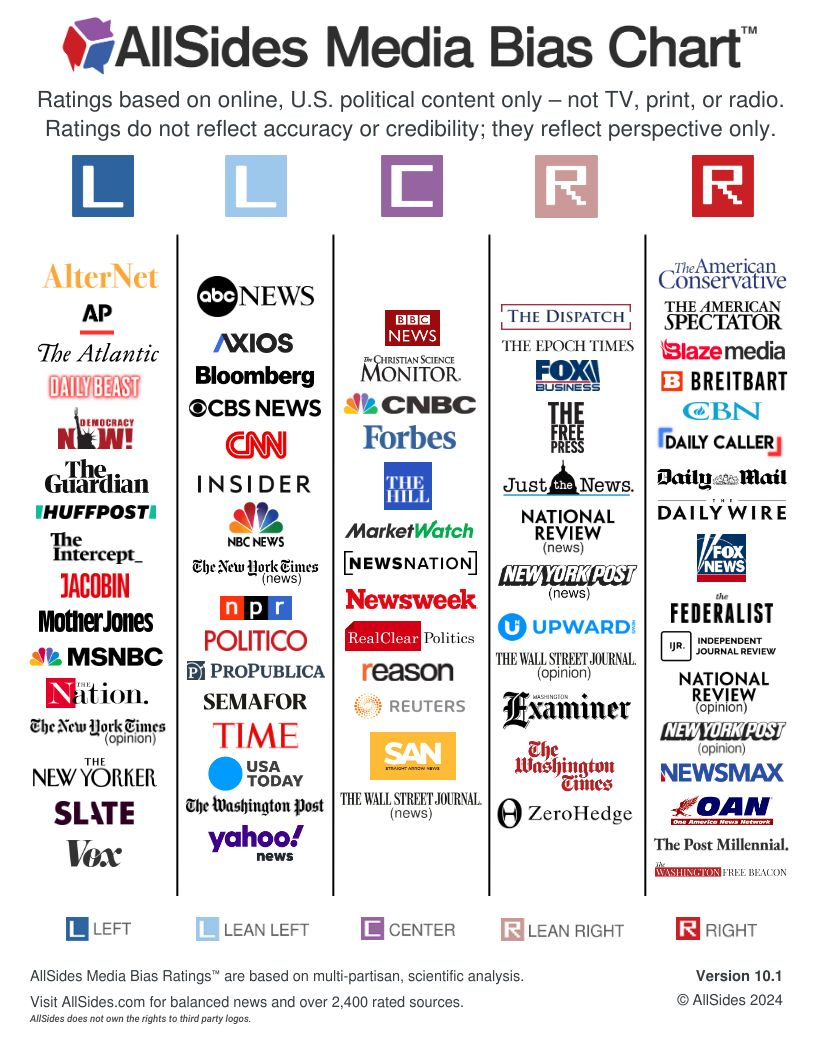

#### 2. Scraping and storing the data
We obtained this data from scraping from the publicly available live sitemaps of these sites. In the file `sitemaps.py` we use functions that get all the sitemap urls for our sources. Once we obtained the sitemaps, we created functions in `articles.py` that use the requests and beautiful soup libraries to scrape the sitemaps for a given timeperiod and obtain the article headlines for each day, month, and year for every news site. This data was stored in a dataframe, organized by date and news source, using Pandas. This is then also stored separately in `2018-01_through_2023-12.pkl` so we don't need to rescrape the sitemaps every time.

In [3]:
# All imports needed to run the code
%load_ext autoreload
%autoreload 2

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import articles
import sentiment_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Code to scrape all the data for 5 years from 4 sources
# This has been commented out to improve efficiency.
start_year = 2018
end_year = 2023
start_month = 1
end_month = 12
years = [start_year, end_year]
months = [start_month, end_month]

'''
dataframe = pd.DataFrame()
[dataframe, example_dataframe] = articles.get_data(start_year, end_year, start_month, end_month)
dataframe.to_pickle(f"{start_year}-{start_month}_through_{end_year}-{end_month}.pkl")
'''

dataframe2 = pd.read_pickle('2018-1_through_2023-12.pkl')
print(dataframe2)

                                            2018-01-01  \
CNN  [Mariah Carey's NYE hot tea is the first meme ...   
NYT  [Mariah Carey Redeems Herself on New Year’s Ev...   
BI   [300 top Hollywood women reveal sweeping anti-...   
ET   [u s airport immigration computers go down tem...   

                                            2018-01-02  \
CNN  [Hugh Jackman and other stars who'll turn 50 i...   
NYT  [In a Top-Heavy Premier League, More Teams Rus...   
BI   [Carson Palmer announces retirement after 15 y...   
ET   [4 year old boy sings to baby sister in heaven...   

                                            2018-01-03  \
CNN  [Hey President Trump, please don't stop tweeti...   
NYT  [Iran, North Korea, Donald Trump: Your Wednesd...   
BI   [Intel CEO: Google discovered the chip problem...   
ET   [new years day house fire claims three oklahom...   

                                            2018-01-04  \
CNN  [US suspends security assistance to Pakistan, ...   
NYT  [Storm


#### 3. Sentiment Analysis
We then used the sentiment analyser from the nltk library to determine the positive, negative and neutral connotation of every headline that contains a chosen keyword for each news source. The functions for this are in the file 'sentiment_functions.py`.

In [5]:
[issue1_values, issue1_title_counts] = sentiment_functions.word_sentiment(years, months,'immigration', dataframe2)
[issue2_values, issue2_title_counts] = sentiment_functions.word_sentiment(years, months,'healthcare', dataframe2)
[issue3_values, issue3_title_counts] = sentiment_functions.word_sentiment(years, months,'gun', dataframe2)

### Results

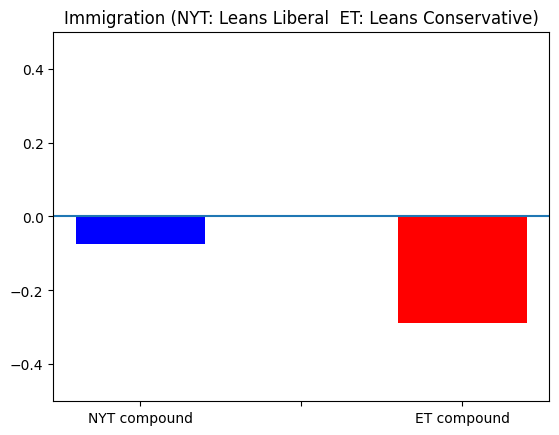

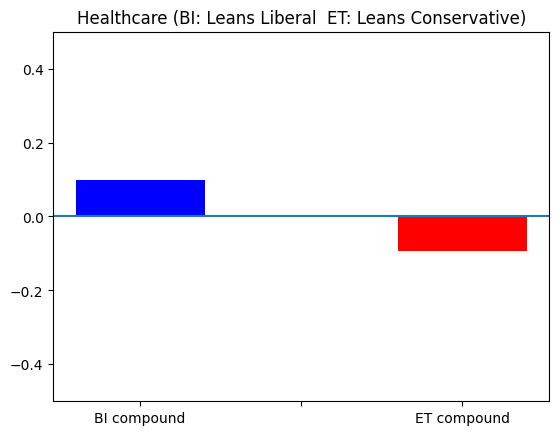

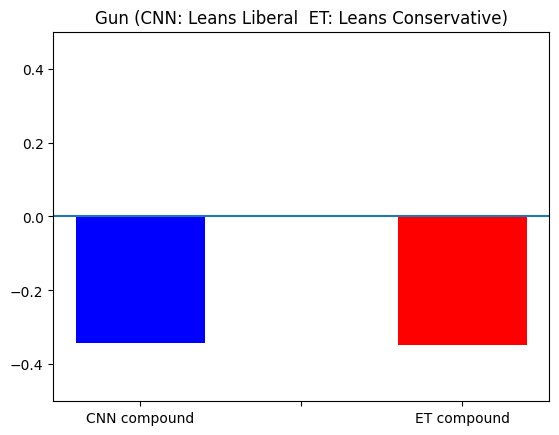

In [10]:
sentiment_functions.plot_sentiment_comparison(issue1_values,'NYT','ET','Immigration (NYT: Leans Liberal  ET: Leans Conservative)')
sentiment_functions.plot_sentiment_comparison(issue2_values,'BI','ET','Healthcare (BI: Leans Liberal  ET: Leans Conservative)')
sentiment_functions.plot_sentiment_comparison(issue3_values,'CNN','ET','Gun (CNN: Leans Liberal  ET: Leans Conservative)')

From the results of the sentiment analysis, we were able to create the above visuals that compared our sources based on our selected keywords - `Immigration`, `Healthcare`, and `Gun`. We see a noticable difference in the way these terms are reported on by the sources. When comparing `immigration` related articles between CNN and Epoch Times, Epoch Times is much more negative, which reflects their conservative leaning bias. Similarly, when comparing `healthcare` related articles Business Insider, a news source with a more liberal leaning bias, healthcare is viewed more favorably. 

However, when `gun` is inputed you can see that there isn't much of difference despite CNN and Epoch Times' differing bias. What this shows is that while for some issues the favorability of language can vary largely based on viewpoint, for others the general negative or positive connotation associated with it can far overshadow bias, such as with guns.

Choose a word or topic:
Choose first news source (CNN, NYT, BI, ET):
Choose second news source (CNN, NYT, BI, ET):


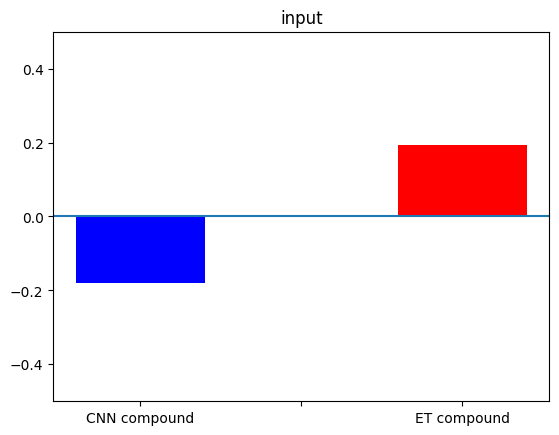

In [13]:
print("Choose a word or topic:")
input_word = input()


print("Choose first news source (CNN, NYT, BI, ET):")
input_news_1 = input().upper()
while input_news_1 not in ['CNN', 'NYT', 'BI', 'ET']:
    print("That's not an option. Write CNN, NYT, BI, or ET")
    input_news_1 = input().upper()


print("Choose second news source (CNN, NYT, BI, ET):")
input_news_2 = input().upper()
while input_news_2 not in ['CNN', 'NYT', 'BI', 'ET']:
    print("That's not an option. Write CNN, NYT, BI, or ET")
    input_news_2 = input().upper()

[issue_values, issue_title_counts] = sentiment_functions.word_sentiment(years,months,input_word,dataframe2)
sentiment_functions.plot_sentiment_comparison(issue_values,input_news_1,input_news_2,input_word)

One other aspect of news that article sentiment can show is how certain events affect how news sources views people. One great example of this is with how the sentiment of articles about Biden changed during the 2020 presidential election.

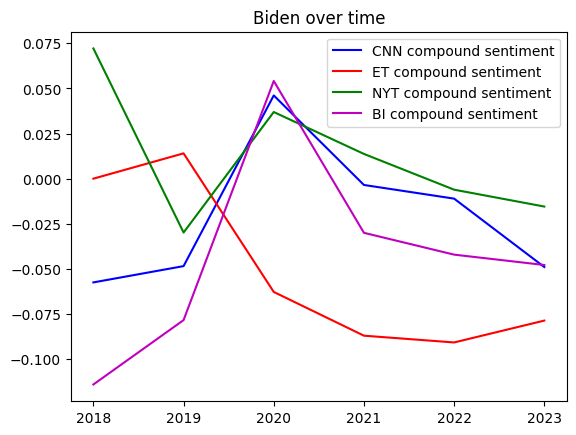

In [14]:
yearly_values = sentiment_functions.yearly_sentiment(2018,2023,'biden',dataframe2)
sentiment_functions.yearly_graph(2018,2023,'Biden',yearly_values)

Epoch Times, despite not having much on Biden prior to 2020 dropped fast around the election period and the time after. Similarly, CNN, New York Times, and Business Insider, which are all liberal leaning news sources, had the most positive views on biden during the election period, with all three dropping slowly after. This shows the push news sources give in favor or not in favor of certain candidates during election times.

### Conclusion

From this project, the reader can learn one way in which you can better understand the bias of a news sources. The visualizations clearly demonstrate a quantitative difference between news sources and how the already determined bias of different news sources is often accurately reflected through the connotation of their articles. While sentimental analysis is far from a perfect way to examine bias, we think it is fascinating to understand through data and visualization viewspoints are reflected in language.

It is also interesting to see how much can be done with publicly available data. All of our data sourcing was ethical. We are using headlines from news websites that make this information publicly available. If we had been using more intrusive metrics that used data from users (for example, viewer demographic data), that would have been ethically questionable. However, for this project, we are simply doing the equivalent of collecting and using old newspapers from a public library, thus we believe our data sourcing is ethically sound.

One of the challenges that we faced was having to write source-specific code since the sitemaps and encoding were different for each source. This meant that we had to manually go into each sitemap and figure out how to extract the specific parts of the data that we wanted. We recognise that this also makes our code error-prone and dependent on the continued consistent formatting of the websites. For the future, being able to use a uniform method to extract the data would save a lot of time, but it doesn't seem to be something that would be likely to happen, given the inherent diversity in website formatting.